In [1]:
%matplotlib inline
from matplotlib.patches import Ellipse
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sns.set_context('notebook')

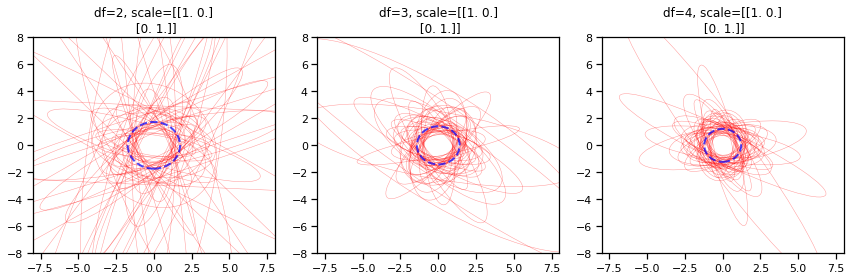

In [55]:
# draw 95% confidence interval of multivariate normal distribution
def draw_ellipse(cov, ax, **kwargs):
    var, U = np.linalg.eig(cov)
    if U[1, 0]:
        angle = 180. / np.pi * np.arctan(U[0, 0]/ U[1, 0])
    else:
        angle = 0

    e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991 * var[0]), 2 * np.sqrt(5.991 * var[1]), 
                angle=angle, facecolor='none', **kwargs)

    ax.add_artist(e)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)

        
# visualize samples from Wishart distribution
def visualize_Wishart(nu, sigma, n_sample, ax):
    delta_samples = stats.wishart(df=nu, scale=sigma).rvs(n_sample)
    
    for delta in delta_samples:
        cov = np.linalg.inv(delta)
        draw_ellipse(cov, ax, edgecolor='r', linewidth=0.5, alpha=0.4)
    # 期待値
    draw_ellipse(np.linalg.inv(nu * sigma), ax, edgecolor='b', linewidth=2.0, linestyle='--', alpha=0.7)
    ax.set_title(f'df={nu}, scale={sigma.round(2)}')


nu_list = [2, 3, 4]
sigma = np.eye(2)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

np.random.seed(2)
for i, nu in enumerate(nu_list):
    visualize_Wishart(nu, sigma, 50, axes[i])
plt.tight_layout()
plt.savefig('Wishart_sample_nu.png')

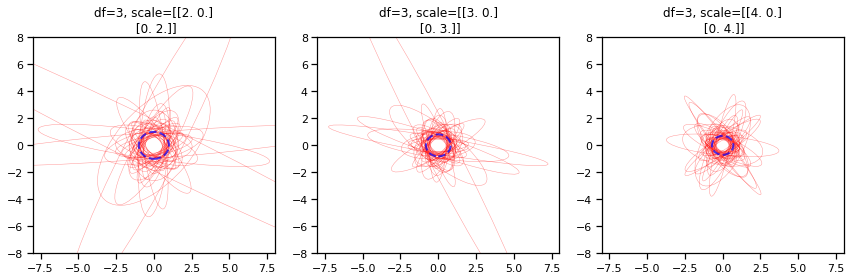

In [62]:
scale_list = [2, 3, 4]
sigma = np.eye(2)
nu = 3

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

np.random.seed(2)
for i, scale in enumerate(scale_list):
    visualize_Wishart(nu, scale * sigma, 50, axes[i])
plt.tight_layout()
plt.savefig('Wishart_sample_sigma.png')

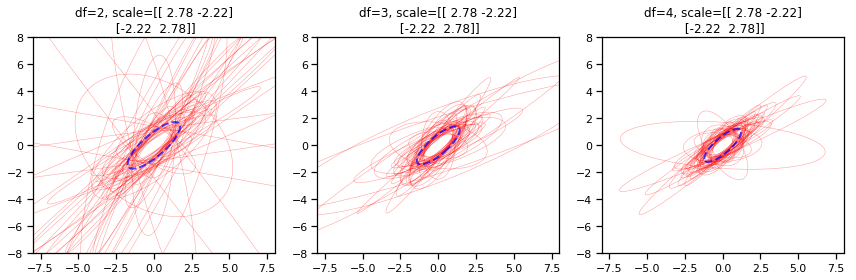

In [65]:
nu_list = [2, 3, 4]
sigma = np.linalg.inv(np.array([[1.0, 0.8], [0.8, 1.0]]))


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

np.random.seed(2)
for i, nu in enumerate(nu_list):
    visualize_Wishart(nu, sigma, 50, axes[i])
plt.tight_layout()
plt.savefig('Wishart_sample_nu_corr0.8.png')

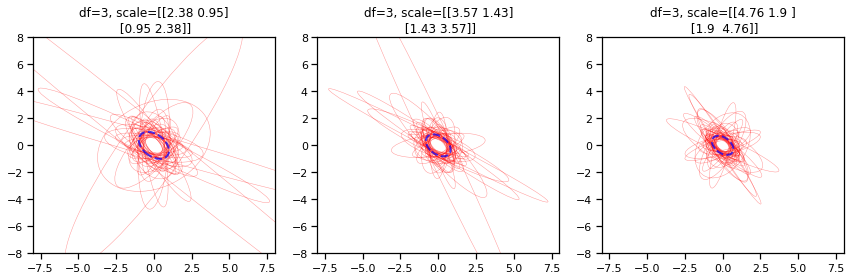

In [66]:
scale_list = [2, 3, 4]
nu = 3
sigma = np.linalg.inv(np.array([[1.0, -0.4], [-0.4, 1.0]]))


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

np.random.seed(2)
for i, scale in enumerate(scale_list):
    visualize_Wishart(nu, scale * sigma, 50, axes[i])
plt.tight_layout()
plt.savefig('Wishart_sample_sigma_corr-0.4.png')